<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li><li><span><a href="#Задание-1.1-Seaborn" data-toc-modified-id="Задание-1.1-Seaborn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 1.1 Seaborn</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [24]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head(15)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.0,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.0,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.0,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.0,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.0,0.0,0.0,NaN,3915.032892,4.383411,6065.052515


In [3]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [28]:
df.nunique()

age                       84
gender                     2
city_type                  5
full_mob                 185
ml_balance               575
cl_balance_0m           8177
loan_balance_0m        11077
td_balance_0m           1434
casa_balance_0m        36395
dc_trx_cnt              1204
dc_trx_sum             29266
income                 19630
min_casa_balance_1q    31824
max_casa_balance_1q    40854
avg_casa_balance_1Y    44790
min_td_balance_1q       1307
max_td_balance_1q       1532
avg_td_balance_1Y       2455
min_loan_balance_1q    10385
max_loan_balance_1q    11779
avg_loan_balance_1Y    13105
min_cl_balance_1q       7766
max_cl_balance_1q       8444
avg_cl_balance_1Y       9530
loan_to_deposit          346
Avg_trx                29748
avgtrx_to_balance      31399
nbi                    47242
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

# Задание 1.1 Seaborn

In [12]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

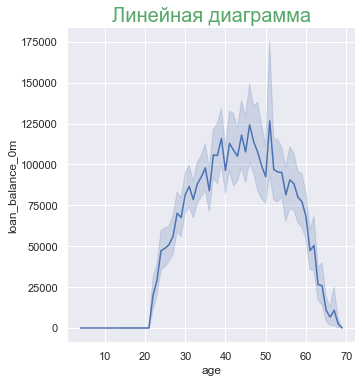

In [21]:
# Линейная диаграмма один к одному для сравниваемых показателей

sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    data=df.query("age < 70"), 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

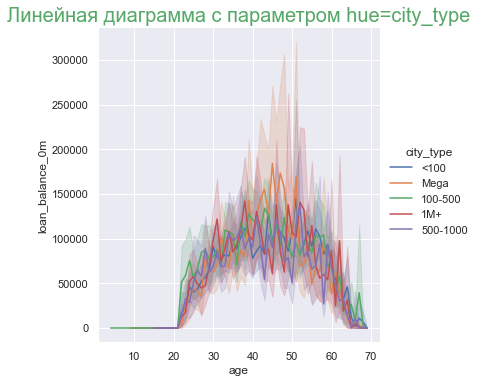

In [29]:
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    hue='city_type', 
    hue_order=day_order,
    data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');

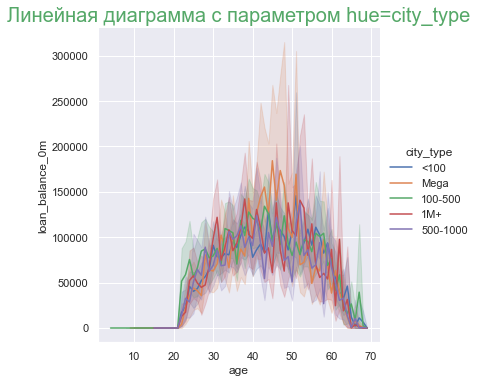

In [31]:
sns.relplot(x='age',
            y='loan_balance_0m',
            hue='city_type',
            hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
            data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма c параметром hue=city_type', size=20, color='g');

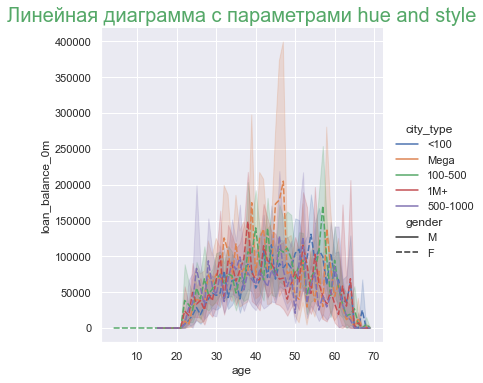

In [33]:
sns.relplot(
    x='age', 
    y='loan_balance_0m',
    hue='city_type', 
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'], 
    style='gender', 
    style_order=['M', 'F'], 
    kind='line', 
    data=df.query("age < 70"))
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();

In [90]:
a = df.ml_balance
c = []
for i in a:
    if i == 0.0:
        c.append('N')
    else:
        c.append('Y')
df["IpotekaY/N"] = c
df["IpotekaY/N"].unique()

array(['N', 'Y'], dtype=object)

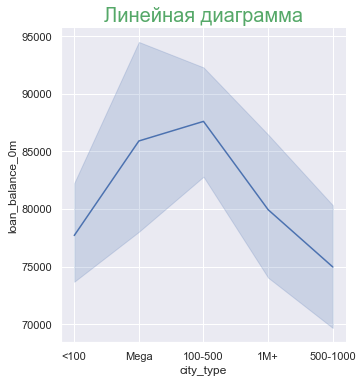

In [91]:
# Линейные диаграммы с отношением один ко многим

sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    data=df, 
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

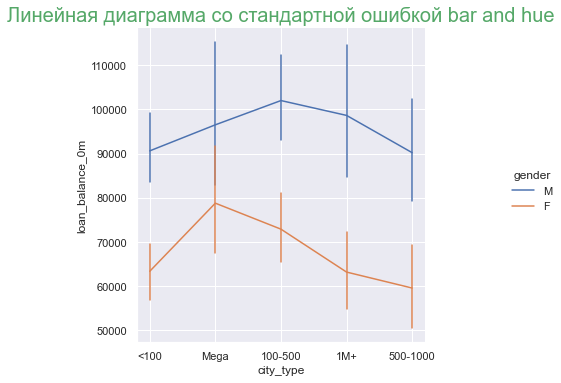

In [95]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    hue='gender', 
    data=df, 
    kind='line',
    err_style="bars", 
    ci=99)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');

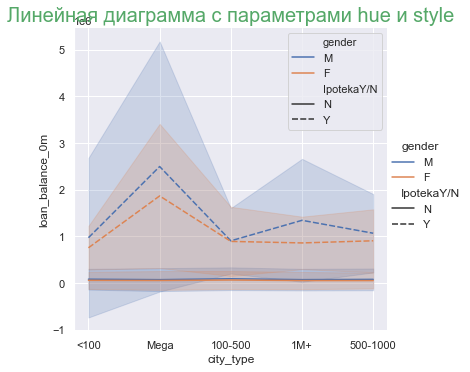

In [93]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N', 
    kind='line', 
    ci='sd', 
    data=df)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend();

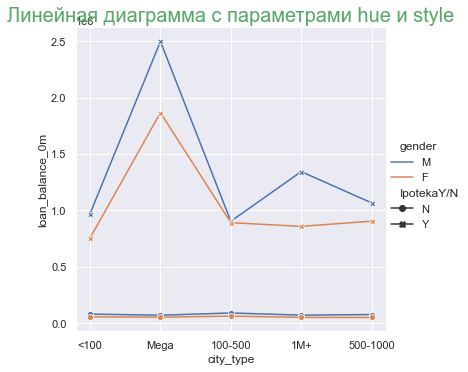

In [96]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N',
    dashes=False, 
    markers=True,
    data=df, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

In [99]:
df_1 = df[['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'avgtrx_to_balance', 'income', 'IpotekaY/N']]
df_1.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N


In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

In [105]:
# Создание длинного датафрейма из датафрейма широкой формы

long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


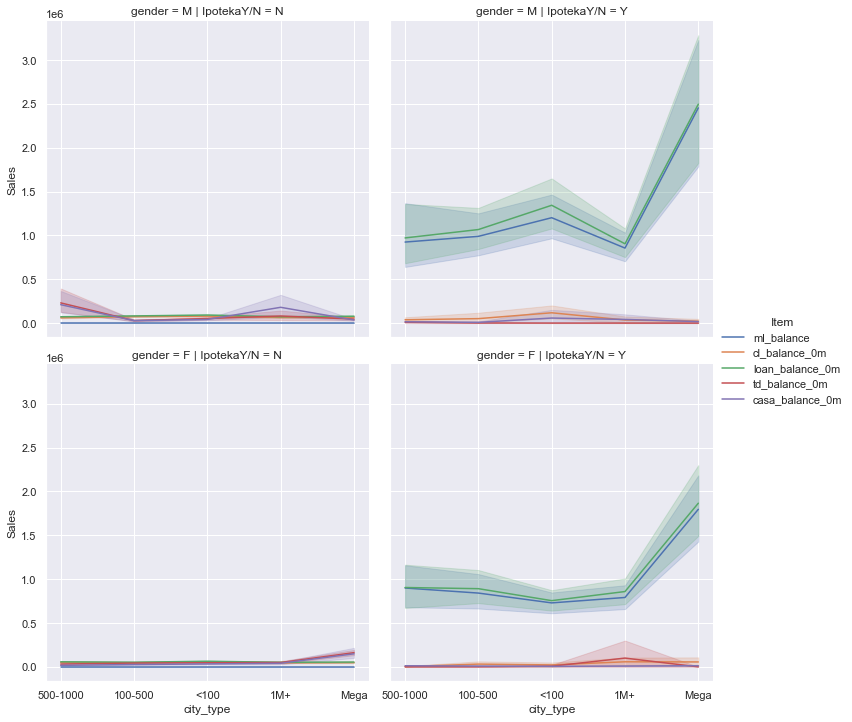

In [107]:
# Линейные диаграммы из датафрейма длинной формы

g = sns.relplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='line', 
    hue='Item', 
    row='gender', 
    col='IpotekaY/N')

In [ ]:
# Scatterplot()

